# Import of libraries and dataset

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR

from scipy.spatial.distance import cdist

warnings.filterwarnings("ignore")

In [94]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/students-performance-dataset/Student_performance_data _.csv


In [95]:
df = pd.read_csv('/kaggle/input/students-performance-dataset/Student_performance_data _.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [96]:
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,0.000000,0.666667,1.0,0.000000,0.50,0.992773,0.241379,1.0,0.50,0.0,0.0,1.0,0.0,0.732299,0.50
1,0.000418,1.000000,0.0,0.000000,0.25,0.771270,0.000000,0.0,0.25,0.0,0.0,0.0,0.0,0.760729,0.25
2,0.000836,0.000000,0.0,0.666667,0.75,0.210718,0.896552,0.0,0.50,0.0,0.0,0.0,0.0,0.028151,1.00
3,0.001255,0.666667,1.0,0.000000,0.75,0.501965,0.482759,0.0,0.75,1.0,0.0,0.0,0.0,0.513555,0.75
4,0.001673,0.666667,1.0,0.000000,0.50,0.233840,0.586207,1.0,0.75,0.0,0.0,0.0,0.0,0.322015,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,0.998327,1.000000,1.0,0.000000,0.75,0.534589,0.068966,0.0,1.00,1.0,0.0,0.0,0.0,0.863877,0.00
2388,0.998745,0.666667,0.0,0.000000,0.25,0.379544,0.137931,1.0,1.00,0.0,1.0,0.0,0.0,0.819787,1.00
2389,0.999164,0.333333,1.0,0.000000,0.50,0.340613,0.689655,0.0,0.50,0.0,0.0,0.0,1.0,0.285583,0.50
2390,0.999582,0.333333,1.0,0.333333,0.00,0.621493,0.586207,0.0,0.50,0.0,1.0,1.0,0.0,0.450824,0.25


# Exploratory data analysis

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [98]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [99]:
df.duplicated().sum()

0

In other words, theres no missing or duplicated data. The dataset are clean and ready to be used

In [100]:
df.drop(['StudentID'], axis = 1, inplace = True)

In [101]:
df.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [102]:
df['GradeClass'] = 4 - df['GradeClass']
df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,3.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,0.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,1.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,4.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,0.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,3.0


In [103]:
df_copy = df.copy()

df_copy['Ethnicity'] = df_copy['Ethnicity'].replace({0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'})
df_copy['Gender'] = df_copy['Gender'].replace({0: 'Male', 1: 'Female'})
df_copy['Age'] = df_copy['Age'].replace({0: 15, 1: 16, 2: 17, 3: 18})
df_copy['ParentalEducation'] = df_copy['ParentalEducation'].replace({0: 'None', 1: 'High School', 2: 'Some College', 3: "Bachelor's", 4: 'Higher'})
df_copy['Tutoring'] = df_copy['Tutoring'].replace({0: 'No', 1: 'Yes'})
df_copy['ParentalSupport'] = df_copy['ParentalSupport'].replace({0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'})
df_copy['Extracurricular'] = df_copy['Extracurricular'].replace({0: 'No', 1: 'Yes'})
df_copy['Sports'] = df_copy['Sports'].replace({0: 'No', 1: 'Yes'})
df_copy['Music'] = df_copy['Music'].replace({0: 'No', 1: 'Yes'})
df_copy['Volunteering'] = df_copy['Volunteering'].replace({0: 'No', 1: 'Yes'})

df_copy
                    

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,Female,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,2.0
1,18,Male,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915,3.0
2,15,Male,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,0.0
3,17,Female,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,1.0
4,17,Female,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,Female,Caucasian,Bachelor's,10.680555,2,No,Very High,Yes,No,No,No,3.455509,4.0
2388,17,Male,Caucasian,High School,7.583217,4,Yes,Very High,No,Yes,No,No,3.279150,0.0
2389,16,Female,Caucasian,Some College,6.805500,20,No,Moderate,No,No,No,Yes,1.142333,2.0
2390,16,Female,African American,None,12.416653,17,No,Moderate,No,Yes,Yes,No,1.803297,3.0


In [104]:
colunas = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']
for column in colunas:
    print(df_copy[column].value_counts().sort_index())
    print()

Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64

Gender
Female    1222
Male      1170
Name: count, dtype: int64

Ethnicity
African American     493
Asian                470
Caucasian           1207
Other                222
Name: count, dtype: int64

ParentalEducation
Bachelor's      367
High School     728
Higher          120
None            243
Some College    934
Name: count, dtype: int64

Absences
0     67
1     85
2     69
3     79
4     69
5     83
6     88
7     86
8     91
9     67
10    61
11    71
12    92
13    93
14    84
15    87
16    79
17    81
18    79
19    90
20    90
21    83
22    71
23    86
24    81
25    93
26    80
27    84
28    54
29    69
Name: count, dtype: int64

Tutoring
No     1671
Yes     721
Name: count, dtype: int64

ParentalSupport
High         697
Low          489
Moderate     740
None         212
Very High    254
Name: count, dtype: int64

Extracurricular
No     1475
Yes     917
Name: count, dtype: int64

Sports
No     1666
Yes

We can here see the distribuition of data along the categories, properly renamed to make it easy to understand

<Axes: >

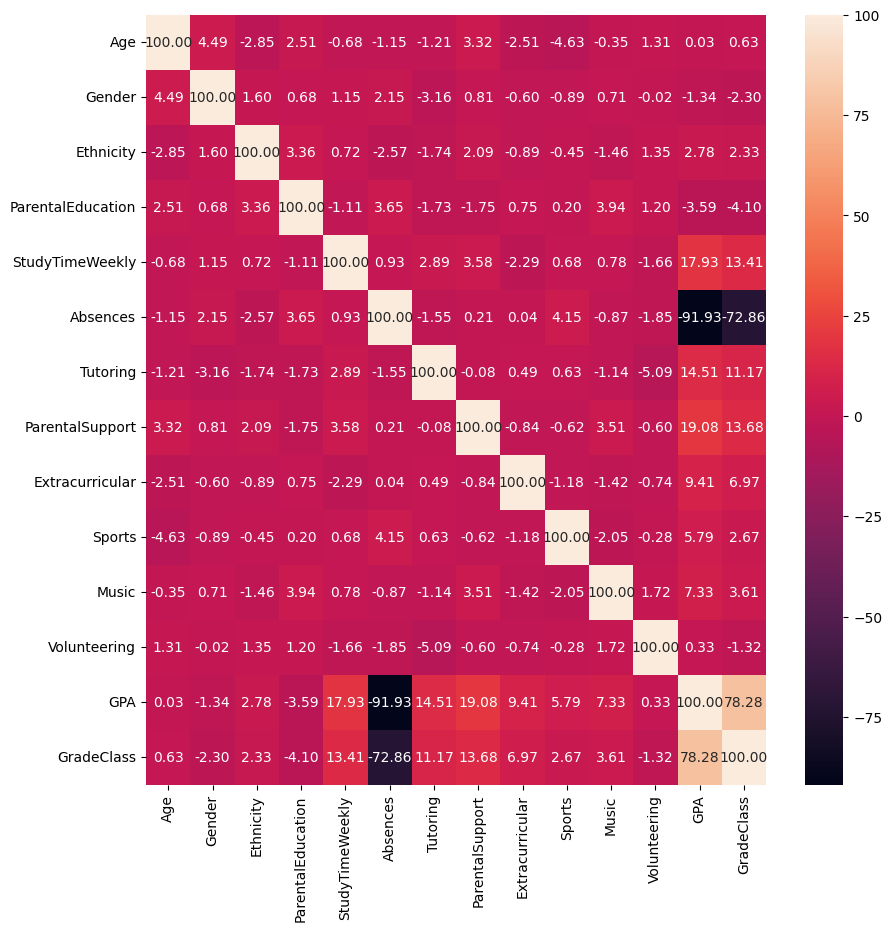

In [105]:
correlation_matrix = df.corr() * 100
plt.figure(figsize = (10, 10))
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f")

The correlation matrix shows that most variables don't share a correlation between they, except for GPA, Absences, StudyTimeWeekly, Tutoring, ParentalSupport and GradeClass. With this in mind, we can think in the future in exclude most of the columns and see if our models will loose readibility or accuracy.

# Feature importances

In [119]:
X = df.drop(columns=['GradeClass', 'GPA'])
y = df['GradeClass']

clf = RandomForestClassifier(random_state = 42)
clf = clf.fit(X, y)

fimp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)

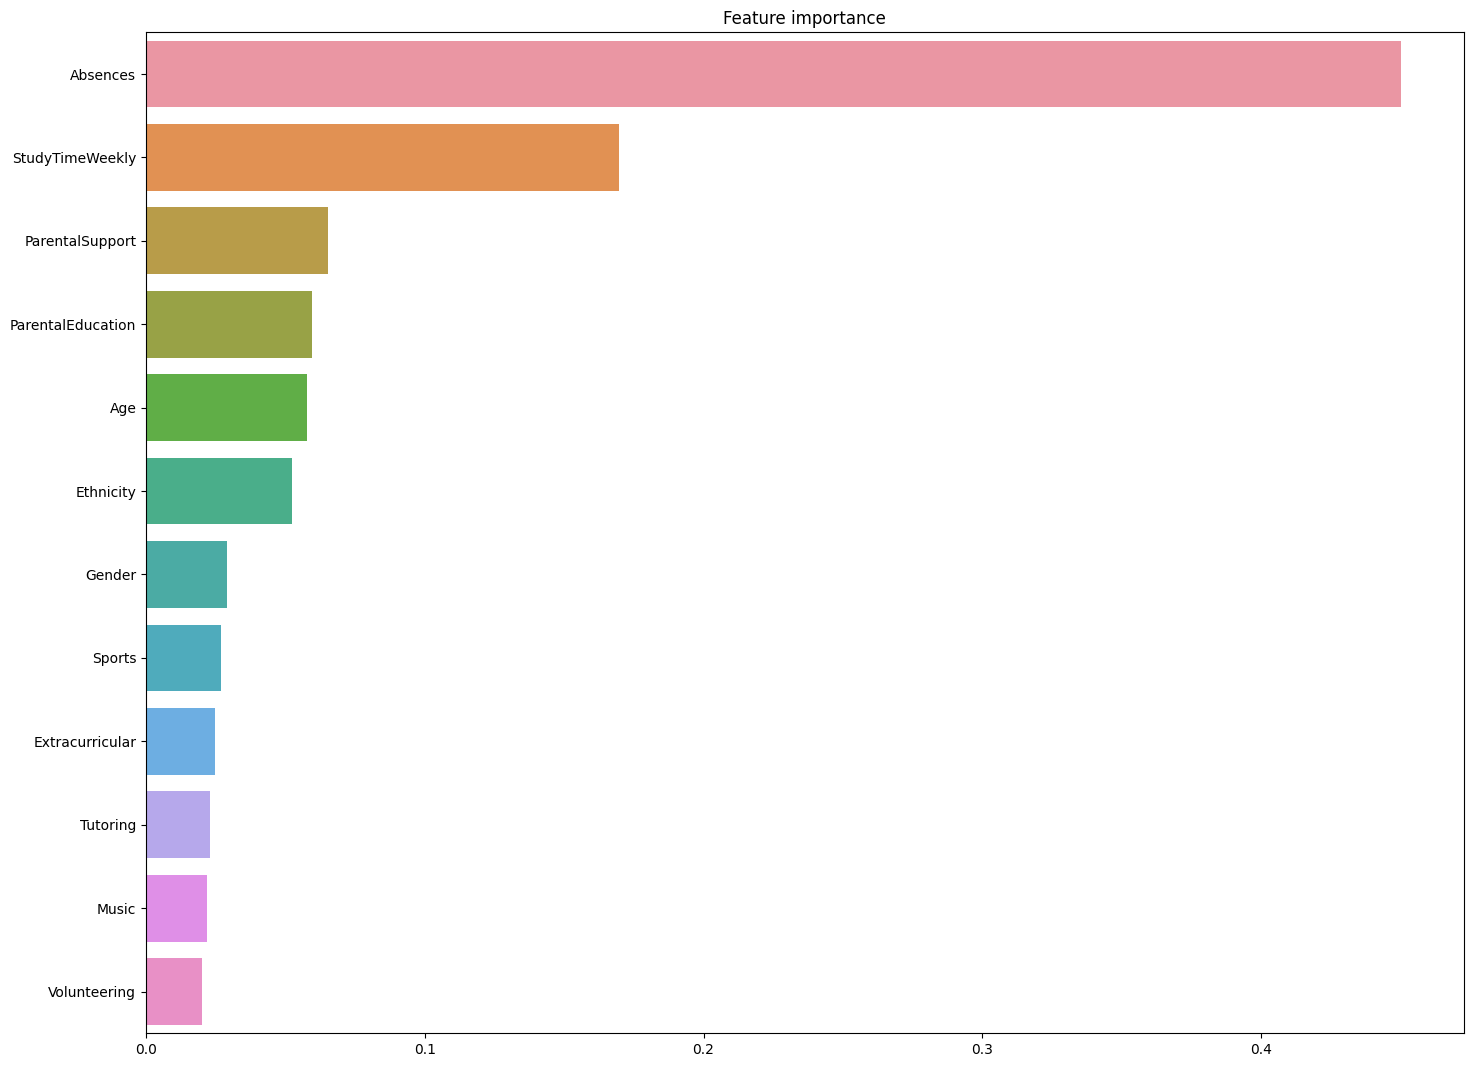

In [120]:
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, orient='h')

# Regressions

In [106]:
X = df.drop(['GPA'], axis = 1)
y = df['GPA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(f"Tamanho das amostras:\nX treino: {X_train.shape}\nX teste: {X_test.shape}\nY treino: {y_train.shape}\nY teste: {y_test.shape}")

Tamanho das amostras:
X treino: (1674, 13)
X teste: (718, 13)
Y treino: (1674,)
Y teste: (718,)


In [107]:
X_norm = df_norm.drop(['GPA'], axis = 1)
y_norm = df_norm['GPA']

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size = 0.3, random_state = 0)
print(f"Tamanho das amostras:\nX treino: {X_train.shape}\nX teste: {X_test.shape}\nY treino: {y_train.shape}\nY teste: {y_test.shape}")

Tamanho das amostras:
X treino: (1674, 13)
X teste: (718, 13)
Y treino: (1674,)
Y teste: (718,)


## Linear regression

### Non normalized data

In [108]:
linear = LinearRegression().fit(X_train, y_train)
pred_linear = linear.predict(X_test)

mse_linear = mean_squared_error(y_test, pred_linear)
mae_linear = mean_absolute_error(y_test, pred_linear)

print(f"Mean squared error of the first model: {mse_linear.round(5)}\nMean absolute error of the first model: {mae_linear.round(5)}")

Mean squared error of the first model: 0.03676
Mean absolute error of the first model: 0.15638


### Normalized data

In [109]:
linear_norm = LinearRegression().fit(X_train_norm, y_train_norm)
pred_linear_norm = linear_norm.predict(X_test_norm)

mse_linear_norm = mean_squared_error(y_test_norm, pred_linear_norm)
mae_linear_norm = mean_absolute_error(y_test_norm, pred_linear_norm)

print(f"Mean squared error of the first model with normalized data: {mse_linear_norm.round(5)}\
        \nMean absolute error of the first model with normalized data: {mae_linear_norm.round(5)}")

Mean squared error of the first model with normalized data: 0.0023        
Mean absolute error of the first model with normalized data: 0.03909


## Support vector machine

### Non normalized data

In [110]:
svm = LinearSVR().fit(X_train, y_train)
pred_svm = svm.predict(X_test)

mse_svm = mean_squared_error(y_test, pred_svm)
mae_svm = mean_absolute_error(y_test, pred_svm)

print(f"Mean squared error of the second model model: {mse_svm.round(5)}\
        \nMean absolute error of the second model: {mae_svm.round(5)}")

Mean squared error of the second model model: 0.0406        
Mean absolute error of the second model: 0.16462


### Normalized data

In [111]:
svm_norm = LinearSVR().fit(X_train_norm, y_train_norm)
pred_svm_norm = svm_norm.predict(X_test_norm)

mse_svm_norm = mean_squared_error(y_test_norm, pred_svm_norm)
mae_svm_norm = mean_absolute_error(y_test_norm, pred_svm_norm)

print(f"Mean squared error of the second model model: {mse_svm_norm.round(5)}\
        \nMean absolute error of the second model: {mae_svm_norm.round(5)}")

Mean squared error of the second model model: 0.00228        
Mean absolute error of the second model: 0.03901


# Show the results of the models

In [112]:
colunas = ['MSE', 'MAE']
values = {'Linear non normalized' : [mse, mae],
       'Linear normalized' : [mse_norm, mae_norm],
       'SVM non normalized' : [mse_svm, mae_svm],
       'SVM normalized' : [mse_svm_norm, mae_svm_norm]}

values = pd.DataFrame(data = values).transpose()
values.columns = colunas
values.sort_values(['MSE'])

,MSE,MAE
SVM normalized,0.002277,0.039012
Linear non normalized,0.036776,0.156375
SVM non normalized,0.040605,0.164617
Linear normalized,0.077830,0.228343
